In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [23]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
#     print(X.shape)
#     print(t.shape)
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
#     c_1hot = np.zeros(N)
    t_1hot = np.zeros([len(t_indices), N])
    i = 0
    for x in t_indices:
        t_1hot[i][x] = 1
        i+=1
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS

    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [5]:
np.random.seed(0)

def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    np.random.seed(0)
    N = t.shape[0]
    indices = np.arange(N)
    np.random.shuffle(indices)
    train_indices = indices[int(testFraction*N):]
    test_indices = indices[:int(testFraction*N)]
    X_train = X[train_indices]
    t_train = t[train_indices]
    X_test = X[test_indices]
    t_test = t[test_indices]

    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [7]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - np.mean(X_train,axis = 0))
    X_train_normalized = X_train_normalized /np.sqrt(np.var(X_train_normalized, axis = 0))
    X_test_normalized = (X_test - np.mean(X_train, axis = 0))
    X_test_normalized = X_test_normalized/np.sqrt(np.var(X_train, axis = 0))
    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [35]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t,no):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    
    acc = 0
    CM = np.zeros((no,no))
    for i in range(len(y)):
        CM[t[i]][y[i]] +=1
        if y[i] == t[i]:
            acc+=1
    print("Test Accuracy: {}".format(acc/len(y)))      
    
    

    return CM

#### Part a (i): sigmoid and Mean squared Loss

Test Accuracy: 1.0
Confusion Matrix on test data. X axis are predicted, Y axis are ground truth
[[11.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  6.]]


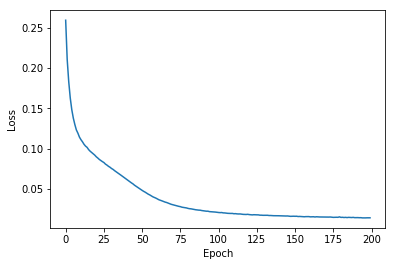

In [36]:
np.random.seed(0)

def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    
    X,t = loadIrisData()
    classes = []
    for y in t:
        if y not in classes:
            classes.append(y)
    
    no = len(classes)
    
    X_train, t_train, X_test, t_test = splitData(X,t)
    X_train , X_test = normalizeX(X_train, X_test)
    t_train = one_hot_encoding(t_train , no)
    
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    
    # Optimizer
    sgd = SGD(lr=0.01, decay=0, momentum=0.9)
    
    #Compile keras
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    
    epochs = 200
    #Fit
    store = model.fit(X_train, t_train, epochs=epochs,batch_size=1,verbose=0)
    
    loss = store.history['loss']
    
    plt.plot(loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred.T, axis = 0)
    
    CM = getCM(y_pred,t_test,no)
    print("Confusion Matrix on test data. X axis are predicted, Y axis are ground truth")
    print(CM)

    
if __name__=="__main__":
    experiment()

#### Part a (ii): softmax and Categorical Cross Entropy Loss

Test Accuracy: 1.0
Confusion Matrix on test data. X axis are predicted, Y axis are ground truth
[[11.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0.  6.]]


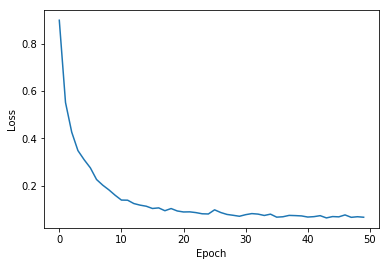

In [37]:
np.random.seed(0)

def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    
    X,t = loadIrisData()
    classes = []
    for y in t:
        if y not in classes:
            classes.append(y)
    
    no = len(classes)
    
    X_train, t_train, X_test, t_test = splitData(X,t)
    X_train , X_test = normalizeX(X_train, X_test)
    t_train = one_hot_encoding(t_train , no)
    
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))
    
    # Optimizer
    sgd = SGD(lr=0.01, decay=0, momentum=0.9)
    
    #Compile keras
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    epochs = 50
    #Fit
    store = model.fit(X_train, t_train, epochs=epochs,batch_size=1,verbose=0)
    
    loss = store.history['loss']
    
    plt.plot(loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred.T, axis = 0)
    
    CM = getCM(y_pred,t_test,no)
    print("Confusion Matrix on test data. X axis are predicted, Y axis are ground truth")
    print(CM)

    
if __name__=="__main__":
    experiment()